In [1]:
import pandas as pd
import numpy as np

In [4]:
data_path = '/home/yash/Downloads/data.csv'
df = pd.read_csv(data_path, index_col=0)

In [9]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler()
scalar.fit(df.drop(labels=['TARGET CLASS'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
features = scalar.transform(df.drop(labels=['TARGET CLASS'], axis=1))

In [29]:
features_df = pd.DataFrame(features, columns=df.columns[:-1])

In [30]:
features_df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [21]:
X = features
y = df['TARGET CLASS']

In [22]:
len(X), len(y)

(1000, 1000)

## Modelling

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2)

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
preds = knn.predict(x_test)

## Evaluating

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       101
           1       0.95      0.91      0.93        99

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [52]:
print(confusion_matrix(y_test, preds))

[[96  5]
 [ 9 90]]


## Choosing the perfect value for 'k' 

In [58]:
#using elbow method to pick a good value of k
max_neighbors = 50
error_rate = []
for i in range(1, max_neighbors):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_preds = knn.predict(x_test)
    error_rate.append(np.mean(y_preds!=y_test)) #getting all those values which 
                                                #are not matching and then taking the mean

In [59]:
#plotting error rate
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Error Rate')

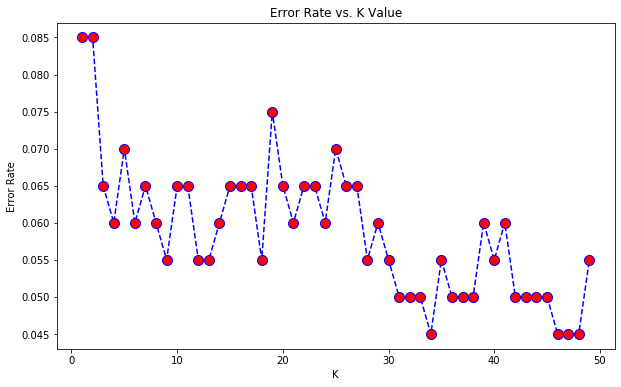

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(1,max_neighbors),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [62]:
#Hmm, looks like a K value of 34 did a good job
#therefore, final fitting with k = 34

knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')

In [63]:
preds = knn.predict(x_test)

In [64]:
print(confusion_matrix(preds, y_test))

[[97  5]
 [ 4 94]]


In [65]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.95      0.96      0.95        98

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

